## Arbitrary Value Imputation
- This technique was derived from kaggle competition
- It consists of replacing NAN by arbitrary value

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

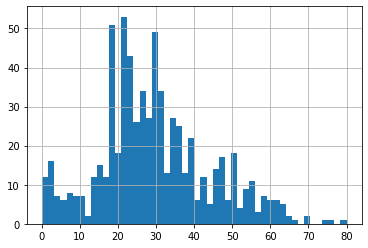

In [3]:
df.age.hist(bins=50)

In [4]:
## Arbitrary values


In [5]:
def impute_nan(df, variable):
    df[variable + "_zero"] = df[variable].fillna(0)
    df[variable + "_hundred"] = df[variable].fillna(100)

## Advantages:
- Easy to implement
- Capture the importance of missingness if there is one

## Disadvantages:
- Distorts the original distribution of the variable
- If missingness is not important, it may mask the prediction power of the original variable by distorting its distirubtion
- Hard to decide which value to use

# **Handling Categorical Data**
### Frequent Category Imputation

In [6]:
df = pd.read_csv(r'C:/Users/jgaur/python_ml/ML/Advacne_House_Price_Prediction/dataset/train.csv',
                 usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
c = [c for c in df.columns if df[c].dtype=='O']

In [10]:
len(c)

3

In [11]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [12]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

## Compute the frequency with every feature

<AxesSubplot:>

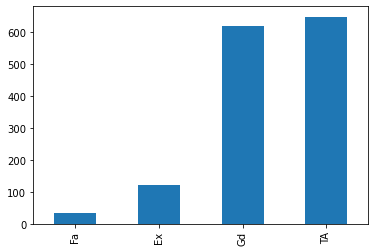

In [13]:
df.BsmtQual.value_counts().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

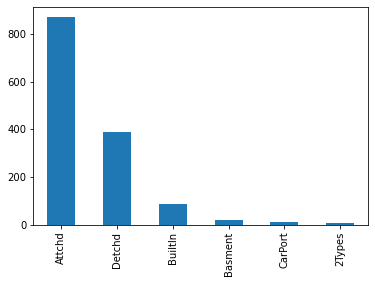

In [14]:
df.GarageType.value_counts().plot.bar()

<AxesSubplot:>

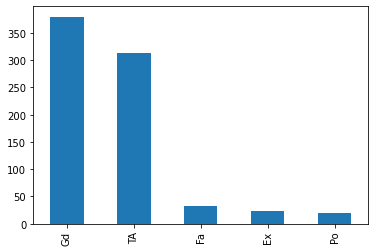

In [15]:
df.FireplaceQu.value_counts().plot.bar()

In [16]:
df.GarageType.value_counts().index[0]

'Attchd'

In [17]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [18]:
impute_nan(df, 'GarageType')

In [19]:
for feature in ["BsmtQual", "FireplaceQu", "GarageType"]:
    impute_nan(df, feature)

In [20]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
df.GarageType.mode()

0    Attchd
dtype: object

## Advantages:
- Easy to implement
- Faster way to implement

## Disadvantages:
- Since we are using the more frequent labels, it may use them in an over represented way, if there are many NaN's
- It distorts the relation of the most frequent label

# **Adding a Variable to capture NaN**

In [22]:
df = pd.read_csv(r'C:/Users/jgaur/python_ml/ML/Advacne_House_Price_Prediction/dataset/train.csv',
                 usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [23]:
import numpy as np

In [24]:
df['BsmtQual_var'] = np.where(df.BsmtQual.isnull(), 1, 0)

In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [26]:
frequent = df.BsmtQual.value_counts().index[0]

In [27]:
df.BsmtQual.fillna(frequent, inplace=True)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [29]:
df['FireplaceQu_Var'] = np.where(df.FireplaceQu.isnull(), 1, 0)
frequent = df.FireplaceQu.value_counts().index[0]
df.FireplaceQu.fillna(frequent, inplace=True)

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent category, we just replace NaN with a new category

In [31]:
df = pd.read_csv(r'C:/Users/jgaur/python_ml/ML/Advacne_House_Price_Prediction/dataset/train.csv',
                 usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
def impute_nan(df, variable):
    df[variable + "_newvar"] = np.where(df[variable].isnull(), "Missing", df[variable])

In [33]:
for feature in ["BsmtQual", "FireplaceQu", "GarageType"]:
    impute_nan(df, feature)

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [35]:
df = df.drop(["BsmtQual", "FireplaceQu", "GarageType"], axis=1)

In [36]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## Handling Categorical Features
### - One Hot Encoding

In [37]:
df = pd.read_csv('titanic.csv', usecols=['sex'])
df.head()

,sex
0,female
1,male
2,female
3,female
4,male


In [38]:
pd.get_dummies(df, drop_first=True).head()

,sex_male
0,0
1,1
2,0
3,0
4,1


In [39]:
df = pd.read_csv('titanic.csv', usecols=['embarked'])

In [40]:
df.embarked.unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [41]:
df.dropna(inplace=True)

In [42]:
pd.get_dummies(df, drop_first=True).head()

,embarked_Q,embarked_S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


## One Hot Encoding with many categories in a feature

In [45]:
df = pd.read_csv('mercedes.csv', usecols=["X0", "X1", "X2", "X3", "X4", "X5", "X6"])

In [46]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [60]:
for i in df.columns:
    print("Caegories in {} is {}".format(i, len(df[i].unique())))

Caegories in X0 is 47
Caegories in X1 is 27
Caegories in X2 is 44
Caegories in X3 is 7
Caegories in X4 is 4
Caegories in X5 is 29
Caegories in X6 is 12


In [71]:
lst_10 = df.X1.value_counts()[:10].index

In [72]:
lst_10 = list(lst_10)

In [73]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [75]:
for category in lst_10:
    df[category] = np.where(df['X1'] == category, 1, 0)

In [76]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [77]:
lst_10.append('X1')

In [79]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
